# Permutationen

Bei Permutationen werden die Elemente in ihrer Reihenfolge vertauscht, bis alle möglichen Kombinationen entstanden sind. Das wird sehr schnell sehr aufwendig dies von Hand zu machen, deshalb eignet sich dafür der Computer, weil es systematisch abgearbeitet werden kann.

Die Frage **welche** Kobinationen lassen sich mit den Buchstaben `'O', 'T', 'R'` erzeugen, kann man mit folgendem Code sehr einfach beantworten.

In [1]:
from itertools import permutations

li = ['O', 'T', 'R']  # Zähle alle verfügbaren Elemente auf

li_perm = permutations(li)  # Erstelle alle Kombinationen mit diesen Elementen
li_perm = list(li_perm)

display(li_perm)

[('O', 'T', 'R'),
 ('O', 'R', 'T'),
 ('T', 'O', 'R'),
 ('T', 'R', 'O'),
 ('R', 'O', 'T'),
 ('R', 'T', 'O')]

Es sind hier nur 6 verschiedene Möglichkeiten, dass kann man auch gut noch von Hand aufzählen. Wie wir aber aus der Mathematik wissen, wächst diese Zahl extrem schnell, mit jedem neuen Zeichen das wir dazu nehmen. Denn die Anzahl an Permutationen ohne Wiederholung berechnet sich mit $n!$.

Erhöhen wir also das ein ein wenig, dann können wir sehr schnell den Aufwand abschätzen. Die folgende Codezelle zeigt auf wie schnell die Fakultät wächst.

In [3]:
from math import factorial

for i in range(1, 16):
    print(f"{i}!: {factorial(i)}")

1!: 1
2!: 2
3!: 6
4!: 24
5!: 120
6!: 720
7!: 5040
8!: 40320
9!: 362880
10!: 3628800
11!: 39916800
12!: 479001600
13!: 6227020800
14!: 87178291200
15!: 1307674368000


Also bereits bei 5 Stellen wir es aufwendig alles zu erzeugen, da ist es dann praktisch wenn der Computer helfen kann.

Betrachten wir noch ein Beispiel aus dem Skript, dass man auch noch gut von Hand erzeugen kann. Zeigen Sie **alle** Kombinationen auf, die mit `'O', 'T', 'T', 'O'` erstellt werden können.

Wir wissen aus der Theorie dass es $4! = 24$ Kombinationen geben muss. Die kann man von Hand erzeugen. Man kann aber bei dem Beispiel bereits sehen das man sehr leicht Fehler machen kann. Da sich die Buchstaben wiederholen, kann man sich hier leicht vertun. Dem Computer passiert das nicht, und somit ist er hier ein nützliches Werkzeug.

In [4]:
from itertools import permutations

li = ['O', 'T', 'T', 'O']  # Zähle alle verfügbaren Elemente auf

li_perm = list( permutations(li) ) # Erstelle alle Kombinationen mit diesen Elementen

display(li_perm)

[('O', 'T', 'T', 'O'),
 ('O', 'T', 'O', 'T'),
 ('O', 'T', 'T', 'O'),
 ('O', 'T', 'O', 'T'),
 ('O', 'O', 'T', 'T'),
 ('O', 'O', 'T', 'T'),
 ('T', 'O', 'T', 'O'),
 ('T', 'O', 'O', 'T'),
 ('T', 'T', 'O', 'O'),
 ('T', 'T', 'O', 'O'),
 ('T', 'O', 'O', 'T'),
 ('T', 'O', 'T', 'O'),
 ('T', 'O', 'T', 'O'),
 ('T', 'O', 'O', 'T'),
 ('T', 'T', 'O', 'O'),
 ('T', 'T', 'O', 'O'),
 ('T', 'O', 'O', 'T'),
 ('T', 'O', 'T', 'O'),
 ('O', 'O', 'T', 'T'),
 ('O', 'O', 'T', 'T'),
 ('O', 'T', 'O', 'T'),
 ('O', 'T', 'T', 'O'),
 ('O', 'T', 'O', 'T'),
 ('O', 'T', 'T', 'O')]

## Duplikate eliminieren

Dieses Beispiel zeigt sehr schön auf wie schnell man sich vertun kann wenn man nur halbwegs strukuriert vorgeht, weil es durch die gleichen Elemente eben auch zu Verwirrung bei der Durchführung kommen kann. Wie wir oben bereits gesehen haben, wird das dem Computer nicht passieren.

Aber was wenn wir die Elemente nicht unterschiedlich betrachten sollen? Was wenn die `O`s und `T`s nicht unterscheidbar sind?

Man kann in der Liste oben sehr einfach sehen das es einige Tuple (Ergebnisse) mehrfach drin hat. Möchten wir das die Dinge nur einfach vorkommen, dann können wir einen tollen Trick verwenden. Das Ereignis oben ist eine Liste von allen Ergebnissen, und eine Liste darf Elemente auch mehrfach haben. Betrachten wir die Liste jedoch als Menge, dann fallen alle Duplikate weg. Das wird sowohl in der Mathematik wie auch der Informatik sehr häufig verwendet.

Die folgende Zelle zeigt wie das geht.

In [6]:
set_perm = set(li_perm)
display(set_perm)

{('O', 'O', 'T', 'T'),
 ('O', 'T', 'O', 'T'),
 ('O', 'T', 'T', 'O'),
 ('T', 'O', 'O', 'T'),
 ('T', 'O', 'T', 'O'),
 ('T', 'T', 'O', 'O')}

Mit der Funktion `set` können wir Elemente also einzigartig machen. Das geht jedoch nur wenn der Computer die Elemente auch als gleich betrachten kann.

## Visualisieren von Permutationen

Permutationen können ja sehr schnell wachsen, deshalb wird es oft schwer diese zu visualisieren. Für kleinere Permutationen funktioniert es jedoch. Wir können auch hier einen Baum zeichnen lassen, damit lässt sich dann gut veranschaulichen wie man alle Kombinationen erzeugen kann, nämlich indem man sich Stelle für Stelle in dem Ergebnis betrachtet, und dieses mit allen Möglichkeiten füllt.

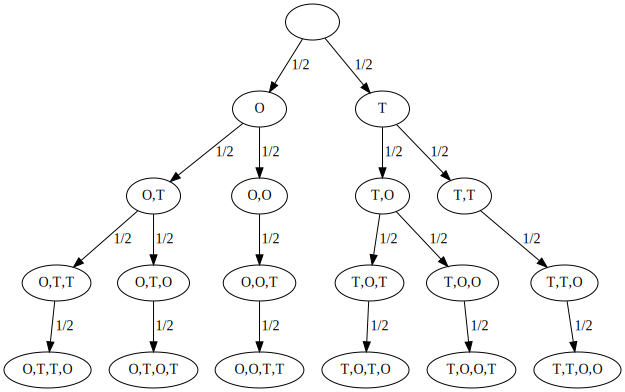

In [7]:
from helpers import construct_tree

display(construct_tree(li_perm))

## Hier stimmt was nicht!!!

Der Baum ist viel zu klein!! Es sollten 24 Blätter sein am Ende, was ist hier passiert?

Hier kommt uns die Technik in die Queere. So wie der Baum gezeichnet wird, kann der Computer nicht unterscheiden welches `O` oder `T` bereits verwendet wird. Vorher war das hilfreich für uns, das wir Duplikate streichen wollten, jetzt möchten wir aber alle Elemente haben, und der Computer streicht die selbstständig...

Um mit dem Problem umzugehen, machen wir alle Buchstaben einfach unterschiedlich. In dem Beispiel hier verwenden wir Gross- und Kleinschreibung damit wir nicht so viel Platz brauchen. In der folgenden Zelle finden Sie den kompletten Code zu dem Beispiel.

[('O', 'T', 't', 'o'),
 ('O', 'T', 'o', 't'),
 ('O', 't', 'T', 'o'),
 ('O', 't', 'o', 'T'),
 ('O', 'o', 'T', 't'),
 ('O', 'o', 't', 'T'),
 ('T', 'O', 't', 'o'),
 ('T', 'O', 'o', 't'),
 ('T', 't', 'O', 'o'),
 ('T', 't', 'o', 'O'),
 ('T', 'o', 'O', 't'),
 ('T', 'o', 't', 'O'),
 ('t', 'O', 'T', 'o'),
 ('t', 'O', 'o', 'T'),
 ('t', 'T', 'O', 'o'),
 ('t', 'T', 'o', 'O'),
 ('t', 'o', 'O', 'T'),
 ('t', 'o', 'T', 'O'),
 ('o', 'O', 'T', 't'),
 ('o', 'O', 't', 'T'),
 ('o', 'T', 'O', 't'),
 ('o', 'T', 't', 'O'),
 ('o', 't', 'O', 'T'),
 ('o', 't', 'T', 'O')]

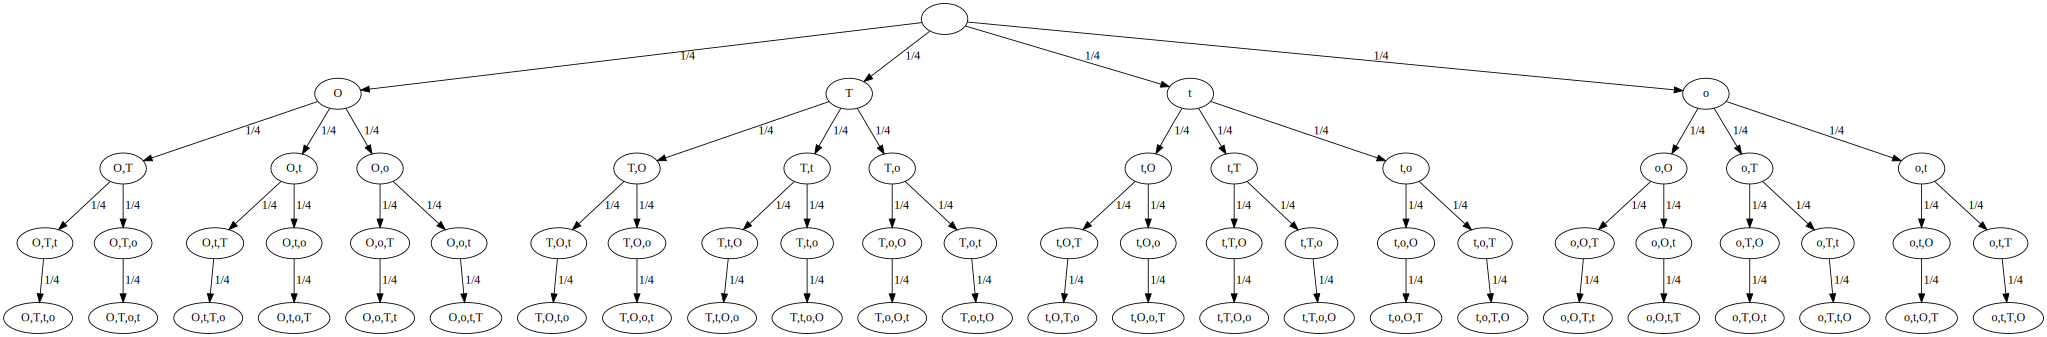

In [8]:
from helpers import construct_tree
from itertools import permutations

li = ['O', 'T', 't', 'o']  # Zähle alle verfügbaren Elemente auf

li_perm = list( permutations(li) ) # Erstelle alle Kombinationen mit diesen Elementen

display(li_perm)

display(construct_tree(li_perm))

## Werkzeuge und ihre Grenzen

Wir sollten die Werkzeuge die wir verwenden kennen und auch ihre Grenzen. Das ist dort wo dann meist auch die Mathematik ins Spiel kommt. Wenn wir den Code von weiter oben einfach so verwendet hätten, dann hätten wir glauben können das der Baum der dort erstellt wurde richtig ist. Wir haben ja nichts falsches gemacht auf dem Lösungsweg. Die Mathematik sagt uns jedoch das es in diesem Beispiel 24 Möglichkeiten geben muss. Die Mathematik kann uns also sagen ob wir eine Aufgabe richtig gelöst haben oder nicht.